In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display
%matplotlib inline

In [28]:
# Čitanje podataka i micanje redundantnih stupaca (značajki)
location = "C:/Users/Josipa Kaselj/FER/Diplomski/4.godina/2.semestar/SEMINAR2/"
data = pd.read_csv(location + 'final_dataset.csv')

data.drop([ 'Date', 'HomeTeam', 'AwayTeam', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC', 'DiffPts','HTFormPts','ATFormPts', 'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3', 'Unnamed: 0'],1, inplace=True)

print(data.head())

#Full Time Result (H=Home Win, D=Draw, A=Away Win)
#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points

#Output - Full Time Result (H=Home Win, NH=Away Win or Draw)

  FTR     HTP     ATP HM1 HM2 HM3 AM1 AM2 AM3  HTGD  ATGD  DiffFormPts
0   H  0.0625  0.0000   L   D   L   L   L   L   0.0   0.0       0.0625
1   H  0.3125  0.2500   W   D   W   W   W   L   0.0   0.0       0.0625
2  NH  0.1250  0.3750   L   L   W   W   W   W   0.0   0.0      -0.2500
3   H  0.2500  0.1250   L   W   W   W   L   L   0.0   0.0       0.1250
4  NH  0.0000  0.3125   L   L   L   D   W   W   0.0   0.0      -0.3125


C:\Users\Josipa Kaselj\AppData\Local\Temp\ipykernel_19104\3705939913.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop([ 'Date', 'HomeTeam', 'AwayTeam', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',


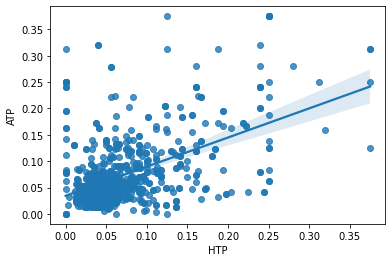

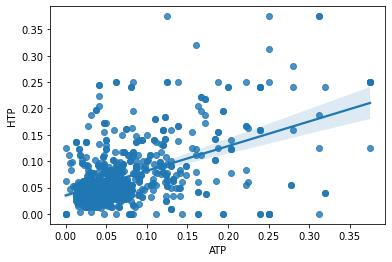

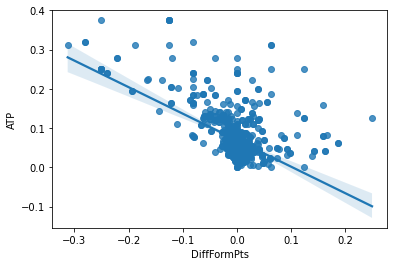

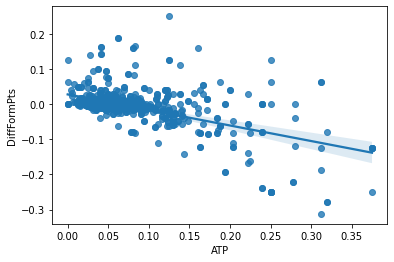

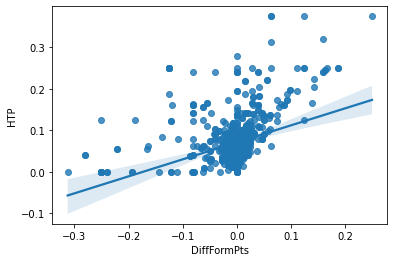

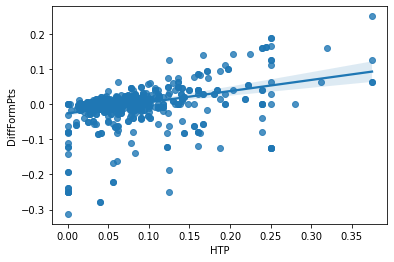

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

#Grafovi pokazuju koliko jedna varijabla utječe na druge - prikazuju njihovu međusobnu korelaciju (pozitivna, negativna)
#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points

sns.regplot(x=data['HTP'], y=data['ATP'])
plt.plot(figsize=(10,10), color='green')
plt.show()
sns.regplot(x=data['ATP'], y=data['HTP'])
plt.plot(figsize=(10,10))
plt.show()

sns.regplot(x=data['DiffFormPts'], y=data['ATP'])
plt.plot(figsize=(10,10))
plt.show()

sns.regplot(x=data['ATP'], y=data['DiffFormPts'])
plt.plot(figsize=(10,10))
plt.show()

sns.regplot(x=data['DiffFormPts'], y=data['HTP'])
plt.plot(figsize=(10,10))
plt.show()
sns.regplot(x=data['HTP'], y=data['DiffFormPts'])
plt.plot(figsize=(10,10))
plt.show()

In [31]:
# Podjela na skup značajki i skup oznake/labele
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],1)
#print(X_all)
y_all = data['FTR']
#print(y_all)

# Standardiziranje podataka
from sklearn.preprocessing import scale

cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

C:\Users\Josipa Kaselj\AppData\Local\Temp\ipykernel_19104\976929866.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_all = data.drop(['FTR'],1)


In [32]:
# Posljednje tri pobjede za oba tima utakmice
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

# Micanje svih kategoričkih varijabli, želimo samo kontinuirane
def preprocess_features(X):

    output = pd.DataFrame(index = X.index)

    for col, col_data in X.iteritems():

        # Ako je značajka kategorička, pretvori se u dummy varijablu
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)

        # Skupljanje pretvorenih stupaca
        output = output.join(col_data)

    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (23 total features):
['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


In [33]:
print("\nFeature values:")
display(X_all)


Feature values:


,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,...,AM1_W,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,HTGD,ATGD,DiffFormPts
0,-0.112099,-1.154344,0,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0.0,0.0,0.062500
1,4.210448,2.823761,0,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0.0,0.0,0.062500
2,0.968538,4.812813,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0.0,0.0,-0.250000
3,3.129811,0.834708,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0.0,0.0,0.125000
4,-1.192736,3.818287,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0.0,0.0,-0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,-0.405072,-0.464806,1,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0.0,0.0,0.000000
860,-0.385861,-0.482487,0,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0.0,0.0,-0.004444
861,-0.577974,-0.641611,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0.0,0.0,-0.001111
862,-0.789299,-0.765374,0,1,0,0,1,0,1,0,...,1,0,0,1,1,0,0,0.0,0.0,-0.002222


In [34]:
from sklearn.model_selection import train_test_split

# Izmješaj i podijeli skup na skupove za treniranje i testiranje
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    test_size = 60,
                                                    random_state = 4,
                                                    stratify = y_all)
print(len(X_train))
print(len(X_test))

804
60


In [35]:
from time import time
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    # Treniranje klasifikatora na podatcima za treniranje
    clf.fit(X_train, y_train)

def predict_labels(clf, features, target):
    # Predikcije istreniranog klasifikatora na neviđenim podatcima (podatci za testiranje)
    y_pred = clf.predict(features)

    return sum(target == y_pred) / float(len(y_pred))

def train_predict(clf, X_train, y_train, X_test, y_test):
    # Treniranje i predikcija

    # Ispis koji model se trenutno koristi
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))

    # Treniranje
    train_classifier(clf, X_train, y_train)

    # Ispis rezultata predikcije za skupove za treniranje i testiranje
    acc = predict_labels(clf, X_train, y_train)
    print("Accuracy score for training set: {:.4f}.".format(acc))

    acc = predict_labels(clf, X_test, y_test)
    print("Accuracy score for test set: {:.4f}.".format(acc))

In [37]:
# Inicijalizacija modela LogReg i SVM
log_reg_model = LogisticRegression(random_state = 50)
svc_model = SVC(kernel='rbf')

train_predict(log_reg_model, X_train, y_train, X_test, y_test)
print('')
train_predict(svc_model, X_train, y_train, X_test, y_test)
print('')

Training a LogisticRegression using a training set size of 804. . .
Accuracy score for training set: 0.6244.
Accuracy score for test set: 0.7500.

Training a SVC using a training set size of 804. . .
Accuracy score for training set: 0.7251.
Accuracy score for test set: 0.7500.



In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# Parametri koji se žele optimizirati
parameters = { 'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc_model = SVC()

# Izvođenje GridSearcha za pronalazak optimiziranih parametara
grid_obj = GridSearchCV(svc_model,
                        param_grid=parameters)

grid_obj = grid_obj.fit(X_train,y_train)

clf = grid_obj.best_estimator_
print(clf.get_params())

acc = predict_labels(clf, X_train, y_train)
print("Accuracy score for training set: {:.4f}.".format(acc))

acc = predict_labels(clf, X_test, y_test)
print("Accuracy score for test set: {:.4f}.".format(acc))

{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Accuracy score for training set: 0.8669.
Accuracy score for test set: 0.7500.
